In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install opendatasets

In [5]:
import opendatasets as od

In [6]:
dataset = 'https://www.kaggle.com/datasets/kartik2112/fraud-detection'

In [7]:
od.download(dataset)

Skipping, found downloaded files in ".\fraud-detection" (use force=True to force download)


In [8]:
import os

In [9]:
df = r'./fraud-detection'  
print(os.listdir(df))

['fraudTest.csv', 'fraudTrain.csv']


In [10]:
train_file = './fraud-detection/fraudTrain.csv'
test_file = './fraud-detection/fraudTest.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [11]:
print(df_train.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [12]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [13]:
print(df_test.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [14]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [15]:
print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)

Train Data Shape: (1296675, 23)
Test Data Shape: (555719, 23)


In [16]:
print("Train Data Description:")
print(df_train.describe())

print("\nTest Data Description:")
print(df_test.describe())

Train Data Description:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.0195

In [17]:
df_train.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [18]:
df_test.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [19]:
missing_train = df_train.isnull().sum()
missing_test = df_test.isnull().sum()

In [20]:
print("Missing Values in Train Data:")
print(missing_train[missing_train > 0])

print("\nMissing Values in Test Data:")
print(missing_test[missing_test > 0])

Missing Values in Train Data:
Series([], dtype: int64)

Missing Values in Test Data:
Series([], dtype: int64)


In [21]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


# Feature Engineering

In [22]:
# 1 Extract Hour of Transaction from unix_time
df_train["transaction_hour"] = pd.to_datetime(df_train["unix_time"], unit="s").dt.hour

# 2 Compute Distance between User Location and Merchant Location
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df_train["user_merchant_distance"] = haversine(df_train["lat"], df_train["long"], df_train["merch_lat"], df_train["merch_long"])

# 3 Identify Unique Transaction Locations per User
user_location_counts_train = df_train.groupby("cc_num")["zip"].nunique().reset_index()
user_location_counts_train.rename(columns={"zip": "num_unique_locations"}, inplace=True)
df_train = df_train.merge(user_location_counts_train, on="cc_num", how="left")

# 4 Create Anomaly Detection Features (Transactions at Odd Hours)
df_train["odd_hour_transaction"] = df_train["transaction_hour"].apply(lambda x: 1 if x < 6 or x > 22 else 0)

print("✅ Feature Engineering Completed!")
print("Updated Dataset Columns:", df_train.columns.tolist())
print(df_train.head())

✅ Feature Engineering Completed!
Updated Dataset Columns: ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'transaction_hour', 'user_merchant_distance', 'num_unique_locations', 'odd_hour_transaction']
   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buck

 # Model Training (Before Feature Selection)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

features = [
    "amt", "transaction_hour", "user_merchant_distance", "num_unique_locations", "odd_hour_transaction"
]

X = df_train[features]
y = df_train["is_fraud"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

classes = np.array([0, 1])  
class_weights = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}

log_reg = LogisticRegression(class_weight="balanced", solver="liblinear")
log_reg.fit(X_train, y_train)

rf = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
rf.fit(X_train, y_train)

log_reg_preds = log_reg.predict(X_val)
rf_preds = rf.predict(X_val)

log_reg_report = classification_report(y_val, log_reg_preds, output_dict=True)
rf_report = classification_report(y_val, rf_preds, output_dict=True)

log_reg_df = pd.DataFrame(log_reg_report).transpose()
rf_df = pd.DataFrame(rf_report).transpose()

print("🔹 Logistic Regression Classification Report:")
print(log_reg_df)

print("\n🔹 Random Forest Classification Report:")
print(rf_df)

🔹 Logistic Regression Classification Report:
              precision    recall  f1-score        support
0              0.998650  0.889274  0.940793  257834.000000
1              0.040047  0.793471  0.076246    1501.000000
accuracy       0.888719  0.888719  0.888719       0.888719
macro avg      0.519348  0.841372  0.508520  259335.000000
weighted avg   0.993102  0.888719  0.935790  259335.000000

🔹 Random Forest Classification Report:
              precision    recall  f1-score        support
0              0.996583  0.998914  0.997747  257834.000000
1              0.688196  0.411726  0.515215    1501.000000
accuracy       0.995515  0.995515  0.995515       0.995515
macro avg      0.842390  0.705320  0.756481  259335.000000
weighted avg   0.994798  0.995515  0.994954  259335.000000


- Logistic Regression:
Finds most fraud cases (high recall) but too many false positives (bad precision).
This is common when using class weighting in Logistic Regression.
- Random Forest:
Much better fraud precision (68%) and a higher F1-score (51%).
Still missing some fraud cases (recall only 41%).

# Feature Selection

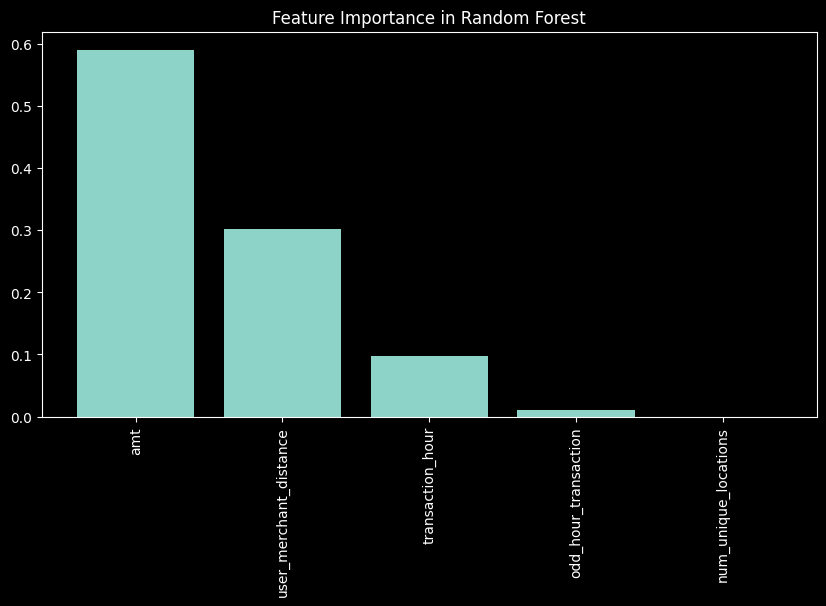

🔹 Feature Importance Ranking:
amt: 0.5900
user_merchant_distance: 0.3024
transaction_hour: 0.0971
odd_hour_transaction: 0.0104
num_unique_locations: 0.0000


In [25]:
from sklearn.ensemble import RandomForestClassifier
plt.style.use("dark_background")

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

feature_importance = rf.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), feature_importance[sorted_idx], align="center")
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.title("Feature Importance in Random Forest")
plt.show()

print("🔹 Feature Importance Ranking:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {feature_importance[i]:.4f}")

In [65]:
# Keep only important features
selected_features = ["amt", "user_merchant_distance", "transaction_hour"]

# Update X_train and X_val
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

# Retrain Random Forest
rf_selected = RandomForestClassifier(class_weight=class_weight_dict, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate Model
rf_preds_selected = rf_selected.predict(X_val_selected)

# Generate Classification Report
from sklearn.metrics import classification_report
rf_report_selected = classification_report(y_val, rf_preds_selected, output_dict=True)

# Convert report to DataFrame
import pandas as pd
rf_df_selected = pd.DataFrame(rf_report_selected).transpose()

# Print results
print("🔹 Random Forest with Selected Features:")
print(rf_df_selected)

🔹 Random Forest with Selected Features:
              precision    recall  f1-score        support
0              0.996583  0.998953  0.997767  257834.000000
1              0.695946  0.411726  0.517371    1501.000000
accuracy       0.995554  0.995554  0.995554       0.995554
macro avg      0.846265  0.705339  0.757569  259335.000000
weighted avg   0.994843  0.995554  0.994986  259335.000000


In [27]:
# Define the selected features based on feature importance
selected_features = ["amt", "user_merchant_distance", "transaction_hour"]

# Update X_train_selected and X_val_selected
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]

 # Hyperparameter Tuning

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

param_dist = {
    'n_estimators': np.arange(100, 250, 50),  
    'max_depth': [10, 20, None],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2]  
}

random_search = RandomizedSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42),
                                   param_distributions=param_dist, 
                                   n_iter=10,  
                                   cv=3,  
                                   n_jobs=-1, 
                                   verbose=2)


X_sample, _, y_sample, _ = train_test_split(X_train_selected, y_train, train_size=0.5, stratify=y_train, random_state=42)
random_search.fit(X_sample, y_sample)

print("🔹 Best Parameters Found:", random_search.best_params_)

best_rf = RandomForestClassifier(**random_search.best_params_, class_weight="balanced", random_state=42)
best_rf.fit(X_train_selected, y_train)

rf_preds_tuned = best_rf.predict(X_val_selected)
rf_report_tuned = classification_report(y_val, rf_preds_tuned, output_dict=True)

rf_df_tuned = pd.DataFrame(rf_report_tuned).transpose()
print("🔹 Tuned Random Forest Model Performance:")
print(rf_df_tuned)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
🔹 Best Parameters Found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
🔹 Tuned Random Forest Model Performance:
              precision    recall  f1-score        support
0              0.996622  0.998945  0.997782  257834.000000
1              0.697778  0.418388  0.523115    1501.000000
accuracy       0.995585  0.995585  0.995585       0.995585
macro avg      0.847200  0.708666  0.760449  259335.000000
weighted avg   0.994892  0.995585  0.995035  259335.000000


In [30]:
best_rf = RandomForestClassifier(n_estimators=200, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1, 
                                 max_depth=None, 
                                 class_weight="balanced", 
                                 random_state=42)

best_rf.fit(X_train_selected, y_train)

rf_preds_tuned = best_rf.predict(X_val_selected)

from sklearn.metrics import classification_report
rf_report_tuned = classification_report(y_val, rf_preds_tuned, output_dict=True)

import pandas as pd
rf_df_tuned = pd.DataFrame(rf_report_tuned).transpose()

print("🔹 Final Tuned Random Forest Model Performance:")
print(rf_df_tuned)

🔹 Final Tuned Random Forest Model Performance:
              precision    recall  f1-score        support
0              0.996622  0.998945  0.997782  257834.000000
1              0.697778  0.418388  0.523115    1501.000000
accuracy       0.995585  0.995585  0.995585       0.995585
macro avg      0.847200  0.708666  0.760449  259335.000000
weighted avg   0.994892  0.995585  0.995035  259335.000000


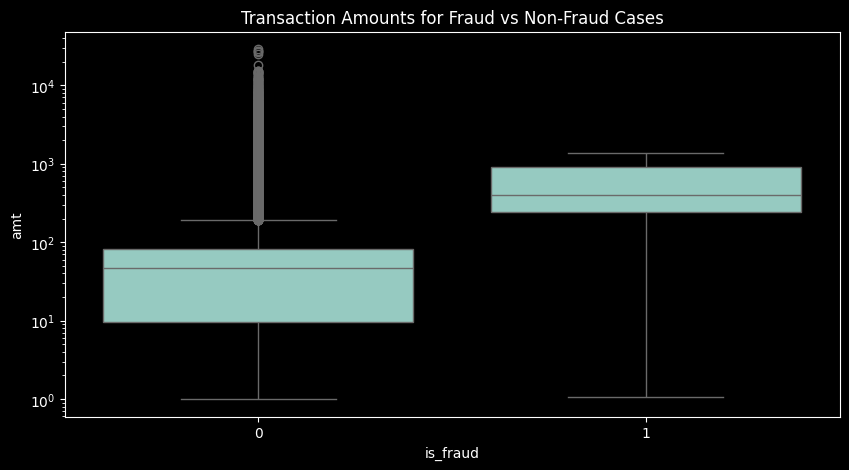

In [31]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["is_fraud"], y=df_train["amt"])
plt.title("Transaction Amounts for Fraud vs Non-Fraud Cases")
plt.yscale("log")  
plt.show()

Fraud cases are more concentrated around higher amounts, while non-fraud cases have a wider range and many small transactions.
Removing extreme non-fraud outliers might help the model focus on normal spending patterns.
- A feature based on transaction amount could be useful, such as:
Flagging unusually high transactions as potential fraud.
Scaling the transaction amount differently for fraud and non-fraud cases.


In [32]:
cap_value = df_train[df_train["is_fraud"] == 0]["amt"].quantile(0.99)
df_train["amt"] = np.where((df_train["is_fraud"] == 0) & (df_train["amt"] > cap_value), cap_value, df_train["amt"])

print("🔹 Capped Transaction Amount at:", cap_value)

🔹 Capped Transaction Amount at: 486.3032000000007


In [33]:
high_amt_threshold = df_train["amt"].quantile(0.95)
df_train["high_transaction"] = df_train["amt"].apply(lambda x: 1 if x > high_amt_threshold else 0)

print("🔹 High transaction feature added based on threshold:", high_amt_threshold)

🔹 High transaction feature added based on threshold: 196.31


In [36]:
selected_features = ["amt", "user_merchant_distance", "transaction_hour", "high_transaction"]

X_train_selected = df_train[selected_features].iloc[X_train.index]
y_train = df_train["is_fraud"].iloc[X_train.index]

X_val_selected = df_train[selected_features].iloc[X_val.index]
y_val = df_train["is_fraud"].iloc[X_val.index]  # Ensure labels match

best_rf.fit(X_train_selected, y_train)

rf_preds_updated = best_rf.predict(X_val_selected)
rf_report_updated = classification_report(y_val, rf_preds_updated, output_dict=True)

rf_df_updated = pd.DataFrame(rf_report_updated).transpose()
print("🔹 Updated Model Performance with Transaction Adjustments:")
print(rf_df_updated)

🔹 Updated Model Performance with Transaction Adjustments:
              precision    recall  f1-score     support
0              0.997449  0.999538  0.998493  257834.000
1              0.876171  0.560959  0.683997    1501.000
accuracy       0.997000  0.997000  0.997000       0.997
macro avg      0.936810  0.780249  0.841245  259335.000
weighted avg   0.996747  0.997000  0.996673  259335.000


In [37]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

scale_pos_weight = (y_train.value_counts()[0] / y_train.value_counts()[1])

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight, 
                          use_label_encoder=False, 
                          eval_metric="logloss", 
                          random_state=42)

xgb_model.fit(X_train_selected, y_train)

xgb_preds = xgb_model.predict(X_val_selected)
xgb_report = classification_report(y_val, xgb_preds, output_dict=True)

import pandas as pd
xgb_df = pd.DataFrame(xgb_report).transpose()

print("🔹 XGBoost Model Performance:")
print(xgb_df)

🔹 XGBoost Model Performance:
              precision    recall  f1-score       support
0              0.999280  0.952136  0.975138  257834.00000
1              0.096890  0.882079  0.174601    1501.00000
accuracy       0.951730  0.951730  0.951730       0.95173
macro avg      0.548085  0.917107  0.574870  259335.00000
weighted avg   0.994057  0.951730  0.970505  259335.00000


In [38]:
xgb_probs = xgb_model.predict_proba(X_val_selected)[:, 1]  

xgb_preds_adjusted = [1 if prob > 0.7 else 0 for prob in xgb_probs]

from sklearn.metrics import classification_report
xgb_report_adjusted = classification_report(y_val, xgb_preds_adjusted, output_dict=True)

import pandas as pd
xgb_df_adjusted = pd.DataFrame(xgb_report_adjusted).transpose()

print("🔹 XGBoost Model Performance (Threshold = 0.7):")
print(xgb_df_adjusted)

🔹 XGBoost Model Performance (Threshold = 0.7):
              precision    recall  f1-score        support
0              0.999012  0.968550  0.983545  257834.000000
1              0.133931  0.835443  0.230854    1501.000000
accuracy       0.967779  0.967779  0.967779       0.967779
macro avg      0.566472  0.901996  0.607200  259335.000000
weighted avg   0.994005  0.967779  0.979188  259335.000000


In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [43]:
test_file = "./fraud-detection/fraudTest.csv"  
df_test = pd.read_csv(test_file)
print(df_test.head())  # Verify the file is loaded correctly

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 

In [48]:
test_file = "./fraud-detection/fraudTest.csv"  
df_test = pd.read_csv(test_file)

df_test["transaction_hour"] = pd.to_datetime(df_test["unix_time"], unit="s").dt.hour

def haversine(row):
    """Calculate the great-circle distance between two points."""
    R = 6371  
    lat1, lon1, lat2, lon2 = map(np.radians, [row["lat"], row["long"], row["merch_lat"], row["merch_long"]])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    return R * (2 * np.arcsin(np.sqrt(a)))

df_test["user_merchant_distance"] = df_test.apply(haversine, axis=1)

high_amt_threshold = df_test["amt"].quantile(0.95)
df_test["high_transaction"] = df_test["amt"].apply(lambda x: 1 if x > high_amt_threshold else 0)

selected_features = ["amt", "user_merchant_distance", "transaction_hour", "high_transaction"]
X_test = df_test[selected_features]
y_test = df_test["is_fraud"]

print("🔹 Test Data After Feature Engineering:")
print(X_test.head())

🔹 Test Data After Feature Engineering:
     amt  user_merchant_distance  transaction_hour  high_transaction
0   2.86               24.561462                12                 0
1  29.84              104.925092                12                 0
2  41.28               59.080078                12                 0
3  60.05               27.698567                12                 0
4   3.19              104.335106                12                 0


In [51]:
joblib.dump(best_rf, "fraud_detection_model.pkl")

print("✅ Model Retrained and Saved Successfully!")

✅ Model Retrained and Saved Successfully!


In [52]:
best_rf = joblib.load("fraud_detection_model.pkl")

test_preds = best_rf.predict(X_test)

rf_test_report = classification_report(y_test, test_preds)

print("🔹 Final Random Forest Test Performance:")
print(rf_test_report)

🔹 Final Random Forest Test Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.60      0.41      0.48      2145

    accuracy                           1.00    555719
   macro avg       0.80      0.70      0.74    555719
weighted avg       1.00      1.00      1.00    555719



In [53]:
test_probs = best_rf.predict_proba(X_test)[:, 1]  
test_preds_adjusted = [1 if prob > 0.3 else 0 for prob in test_probs]  

rf_test_report_adjusted = classification_report(y_test, test_preds_adjusted)
print("🔹 Random Forest Test Performance (Threshold = 0.3):")
print(rf_test_report_adjusted)

🔹 Random Forest Test Performance (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.51      0.48      2145

    accuracy                           1.00    555719
   macro avg       0.72      0.75      0.74    555719
weighted avg       1.00      1.00      1.00    555719



In [55]:
from sklearn.metrics import classification_report

test_probs = best_rf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.25, 0.50, 0.05)  
results = {}

for threshold in thresholds:
    test_preds_adjusted = [1 if prob > threshold else 0 for prob in test_probs]
    report = classification_report(y_test, test_preds_adjusted, output_dict=True)
    
    fraud_metrics = report["1"]
    results[threshold] = {
        "Precision": fraud_metrics["precision"],
        "Recall": fraud_metrics["recall"],
        "F1-Score": fraud_metrics["f1-score"]
    }

threshold_results_df = pd.DataFrame(results).transpose()

print("🔹 Threshold Tuning Results:")
print(threshold_results_df)

🔹 Threshold Tuning Results:
      Precision    Recall  F1-Score
0.25   0.407499  0.537063  0.463395
0.30   0.448020  0.506294  0.475378
0.35   0.494045  0.483450  0.488690
0.40   0.528686  0.459674  0.491771
0.45   0.565164  0.432634  0.490098


In [56]:
final_threshold = 0.35
test_preds_final = [1 if prob > final_threshold else 0 for prob in test_probs]

final_test_report = classification_report(y_test, test_preds_final)

print("🔹 Final Random Forest Performance (Threshold = 0.35):")
print(final_test_report)

🔹 Final Random Forest Performance (Threshold = 0.35):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.49      0.48      0.49      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.74      0.74    555719
weighted avg       1.00      1.00      1.00    555719



In [57]:
xgb_preds = xgb_model.predict(X_test)  
hybrid_preds = [1 if (rf == 1 or xgb == 1) else 0 for rf, xgb in zip(test_preds_final, xgb_preds)]

hybrid_report = classification_report(y_test, hybrid_preds)
print("🔹 Hybrid Model (RF + XGBoost) Performance:")
print(hybrid_report)

🔹 Hybrid Model (RF + XGBoost) Performance:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.07      0.87      0.12      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.91      0.55    555719
weighted avg       1.00      0.95      0.97    555719



In [59]:
rf_probs = best_rf.predict_proba(X_test)[:, 1]  
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]  


thresholds = np.arange(0.25, 0.50, 0.05)  
results = {}

for threshold in thresholds:
    
    hybrid_preds_adjusted = [1 if (rf > threshold or xgb > threshold) else 0 for rf, xgb in zip(rf_probs, xgb_probs)]
    
    
    report = classification_report(y_test, hybrid_preds_adjusted, output_dict=True)
    
    
    fraud_metrics = report["1"]
    results[threshold] = {
        "Precision": fraud_metrics["precision"],
        "Recall": fraud_metrics["recall"],
        "F1-Score": fraud_metrics["f1-score"]
    }

threshold_results_df = pd.DataFrame(results).transpose()

print("🔹 Hybrid Model Threshold Tuning Results:")
print(threshold_results_df)

🔹 Hybrid Model Threshold Tuning Results:
      Precision    Recall  F1-Score
0.25   0.041905  0.927273  0.080185
0.30   0.046351  0.918881  0.088251
0.35   0.051111  0.905828  0.096763
0.40   0.055429  0.895571  0.104397
0.45   0.060195  0.884848  0.112721


# so far among all the models we testes the best where random forest at 0.35 threshold

In [60]:
pip install tensorflow

  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl.metadata (8.5 kB)
Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
    --------------------------------------- 10.2/413.4 kB ? eta -:--:--
   -- ------------------------------------ 30.7/413.4 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 61.4/413.4 kB 409.6 kB/s eta 0:00:01
   --------- ---------------------------- 102.4/413.4 kB 587.0 kB/s eta 0:00:01
   --------------- ---------------------- 174.1/413.4 kB 871.5 kB/s eta 0:00:01
   ---------------------- ----------------- 235.5/413.4 kB 1.0 MB/s eta 0:00:01
   ----------------------------- ---------- 307.2/413.4 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 389.1/413.4 kB 1.3 MB/s eta 0:00:01
   --------------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
altair 5.5.0 requires typing-extensions>=4.10.0; python_version < "3.14", but you have typing-extensions 4.5.0 which is incompatible.
pyfume 0.3.4 requires numpy==1.24.4, but you have numpy 1.24.3 which is incompatible.
pyfume 0.3.4 requires pandas==1.5.3, but you have pandas 2.2.3 which is incompatible.
pyfume 0.3.4 requires scipy==1.10.1, but you have scipy 1.15.2 which is incompatible.
sqlalchemy 2.0.25 requires typing-extensions>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train = pd.read_csv(train_file)  # Update path if needed

df_train["transaction_hour"] = pd.to_datetime(df_train["unix_time"], unit="s").dt.hour

def haversine(row):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [row["lat"], row["long"], row["merch_lat"], row["merch_long"]])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    return R * (2 * np.arcsin(np.sqrt(a)))

df_train["user_merchant_distance"] = df_train.apply(haversine, axis=1)

high_amt_threshold = df_train["amt"].quantile(0.95)
df_train["high_transaction"] = df_train["amt"].apply(lambda x: 1 if x > high_amt_threshold else 0)

selected_features = ["amt", "user_merchant_distance", "transaction_hour", "high_transaction"]
X = df_train[selected_features]
y = df_train["is_fraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("✅ Data is Ready for Deep Learning!")

✅ Data is Ready for Deep Learning!


In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), 
    Dropout(0.3),  
    Dense(64, activation='relu'), 
    Dropout(0.2),
    Dense(32, activation='relu'),  
    Dense(1, activation='sigmoid')  
])

dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ Neural Network Model Compiled!")

✅ Neural Network Model Compiled!


In [64]:
history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

val_loss, val_accuracy = dnn_model.evaluate(X_val, y_val, verbose=1)

print(f"✅ Neural Network Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20
32417/32417 [==============================] - 60s 2ms/step - loss: 0.0204 - accuracy: 0.9951 - val_loss: 0.0178 - val_accuracy: 0.9954
Epoch 2/20
32417/32417 [==============================] - 57s 2ms/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0178 - val_accuracy: 0.9953
Epoch 3/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0173 - accuracy: 0.9953 - val_loss: 0.0168 - val_accuracy: 0.9953
Epoch 4/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0170 - accuracy: 0.9954 - val_loss: 0.0163 - val_accuracy: 0.9955
Epoch 5/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0169 - accuracy: 0.9954 - val_loss: 0.0162 - val_accuracy: 0.9955
Epoch 6/20
32417/32417 [==============================] - 63s 2ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0154 - val_accuracy: 0.9955
Epoch 7/20
32417/32417 [==============================] - 62s 2ms/step - loss: 0.0166 - accuracy: 0.9955 - val_loss: 0

In [65]:
from sklearn.metrics import classification_report

y_pred_probs = dnn_model.predict(X_val)  
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_probs]  

print("🔹 Neural Network Fraud Detection Performance:")
print(classification_report(y_val, y_pred))

8105/8105 [==============================] - 7s 806us/step
🔹 Neural Network Fraud Detection Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.74      0.37      0.49      1501

    accuracy                           1.00    259335
   macro avg       0.87      0.68      0.74    259335
weighted avg       0.99      1.00      0.99    259335



In [66]:
y_pred_probs = dnn_model.predict(X_val) 
y_pred_adjusted = [1 if prob > 0.3 else 0 for prob in y_pred_probs]  

from sklearn.metrics import classification_report
print("🔹 Neural Network Performance (Threshold = 0.3):")
print(classification_report(y_val, y_pred_adjusted))

8105/8105 [==============================] - 7s 798us/step
🔹 Neural Network Performance (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.63      0.49      0.55      1501

    accuracy                           1.00    259335
   macro avg       0.81      0.75      0.78    259335
weighted avg       0.99      1.00      1.00    259335



In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 🚀 Improved Neural Network Model
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])


dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = dnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)


val_loss, val_accuracy = dnn_model.evaluate(X_val, y_val, verbose=1)
print(f"✅ Improved Neural Network Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20
32417/32417 [==============================] - 90s 3ms/step - loss: 0.0206 - accuracy: 0.9951 - val_loss: 0.0178 - val_accuracy: 0.9955
Epoch 2/20
32417/32417 [==============================] - 87s 3ms/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.0169 - val_accuracy: 0.9956
Epoch 3/20
32417/32417 [==============================] - 82s 3ms/step - loss: 0.0179 - accuracy: 0.9954 - val_loss: 0.0170 - val_accuracy: 0.9949
Epoch 4/20
32417/32417 [==============================] - 83s 3ms/step - loss: 0.0177 - accuracy: 0.9955 - val_loss: 0.0166 - val_accuracy: 0.9956
Epoch 5/20
32417/32417 [==============================] - 84s 3ms/step - loss: 0.0174 - accuracy: 0.9955 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 6/20
32417/32417 [==============================] - 84s 3ms/step - loss: 0.0173 - accuracy: 0.9954 - val_loss: 0.0160 - val_accuracy: 0.9956
Epoch 7/20
32417/32417 [==============================] - 85s 3ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0

In [68]:
y_pred_probs = dnn_model.predict(X_val)

final_threshold = 0.3
y_pred_adjusted = [1 if prob > final_threshold else 0 for prob in y_pred_probs]

print("🔹 Final Neural Network Performance (Threshold = 0.3):")
print(classification_report(y_val, y_pred_adjusted))

8105/8105 [==============================] - 9s 1ms/step
🔹 Final Neural Network Performance (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.59      0.55      0.57      1501

    accuracy                           1.00    259335
   macro avg       0.79      0.78      0.78    259335
weighted avg       1.00      1.00      1.00    259335



In [70]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df_train = pd.read_csv(train_file)

df_train["transaction_hour"] = pd.to_datetime(df_train["unix_time"], unit="s").dt.hour

def haversine(row):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [row["lat"], row["long"], row["merch_lat"], row["merch_long"]])
    dlat, dlon = lat2 - lat1, lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    return R * (2 * np.arcsin(np.sqrt(a)))

df_train["user_merchant_distance"] = df_train.apply(haversine, axis=1)

high_amt_threshold = df_train["amt"].quantile(0.95)
df_train["high_transaction"] = df_train["amt"].apply(lambda x: 1 if x > high_amt_threshold else 0)

selected_features = ["amt", "user_merchant_distance", "transaction_hour", "high_transaction"]
X = df_train[selected_features]
y = df_train["is_fraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  

X_train, X_val, y_train, y_val = train_test_split(X_reshaped, y, test_size=0.2, stratify=y, random_state=42)

print("✅ Data Reshaped for CNN (Format: Samples, Features, Channels)")

✅ Data Reshaped for CNN (Format: Samples, Features, Channels)


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),  
    MaxPooling1D(pool_size=2),  
    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ CNN Model Compiled!")


✅ CNN Model Compiled!


In [72]:
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val, verbose=1)

print(f"✅ CNN Model Validation Accuracy: {val_accuracy:.4f}")

Epoch 1/20
32417/32417 [==============================] - 68s 2ms/step - loss: 0.0219 - accuracy: 0.9950 - val_loss: 0.0185 - val_accuracy: 0.9954
Epoch 2/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0190 - accuracy: 0.9954 - val_loss: 0.0176 - val_accuracy: 0.9955
Epoch 3/20
32417/32417 [==============================] - 56s 2ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 0.0173 - val_accuracy: 0.9955
Epoch 4/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0184 - accuracy: 0.9955 - val_loss: 0.0174 - val_accuracy: 0.9955
Epoch 5/20
32417/32417 [==============================] - 56s 2ms/step - loss: 0.0183 - accuracy: 0.9955 - val_loss: 0.0176 - val_accuracy: 0.9954
Epoch 6/20
32417/32417 [==============================] - 58s 2ms/step - loss: 0.0182 - accuracy: 0.9955 - val_loss: 0.0176 - val_accuracy: 0.9956
Epoch 7/20
32417/32417 [==============================] - 60s 2ms/step - loss: 0.0181 - accuracy: 0.9955 - val_loss: 0

In [73]:
from sklearn.metrics import classification_report

y_pred_probs = cnn_model.predict(X_val)

final_threshold = 0.3
y_pred_adjusted = [1 if prob > final_threshold else 0 for prob in y_pred_probs]

print("🔹 CNN Fraud Detection Performance (Threshold = 0.3):")
print(classification_report(y_val, y_pred_adjusted))

8105/8105 [==============================] - 7s 905us/step
🔹 CNN Fraud Detection Performance (Threshold = 0.3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.69      0.46      0.55      1501

    accuracy                           1.00    259335
   macro avg       0.84      0.73      0.77    259335
weighted avg       1.00      1.00      1.00    259335



# Final Recommendation: Neural Network (DNN, Threshold 0.3)